In [349]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [350]:
result_idx = 36
result_path = Path(f"../data/results/result_{result_idx}.txt")

mean_idx = 20
mean_path = Path(f"../data/results/result_{mean_idx}.txt")

plot_mean = True

In [351]:
def read_results(results_path: Path) -> tuple:
    with open(results_path, 'r') as f:
        lines = f.readlines()
    
    train_losses = None
    test_losses = None
    train_dice_coefficients = None
    test_dice_coefficients = None

    for i, line in enumerate(lines):
        if line.strip() == "Train losses":
        # Next line contains the values
            values = lines[i+1].strip().split('\t')
            train_losses = np.array([float(v) for v in values if v])
        elif line.strip() == "Test losses":
        # Next line contains the values
            values = lines[i+1].strip().split('\t')
            test_losses = np.array([float(v) for v in values if v])
        elif line.strip() == "Train dice coefficient":
            values = lines[i+1].strip().split('\t')
            train_dice_coefficients = np.array([float(v) for v in values if v])
        elif line.strip() == "Test dice coefficient":
            values = lines[i+1].strip().split('\t')
            test_dice_coefficients = np.array([float(v) for v in values if v])
        
    if train_losses is None or test_losses is None:
        raise ValueError("Could not find train or test losses in the results file.")
    return train_losses, test_losses, train_dice_coefficients, test_dice_coefficients

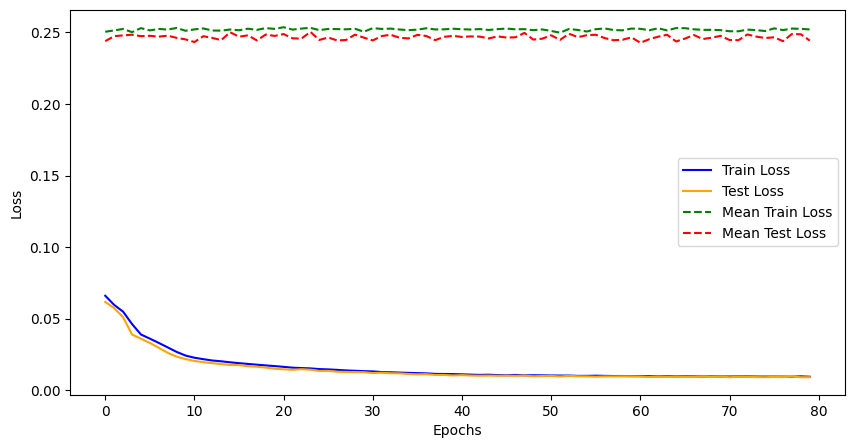

In [352]:
train_losses, test_losses, train_dice_coefficients, test_dice_coefficients = read_results(result_path)

if plot_mean:
    mean_train_losses, mean_test_losses, mean_train_dice_coefficients, mean_test_dice_coefficients = read_results(mean_path)
i = 0

j = min(len(train_losses), len(mean_train_losses))
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(train_losses[i:], label='Train Loss', color='blue')
plt.plot(test_losses[i:], label='Test Loss', color='orange')
if plot_mean:
    plt.plot(mean_train_losses[i:j], label='Mean Train Loss', color='green', linestyle='--')
    plt.plot(mean_test_losses[i:j], label='Mean Test Loss', color='red', linestyle='--')
# plt.xticks(range(len(train_losses[i:])), range(i + 1, len(train_losses[i:]) + i + 1))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

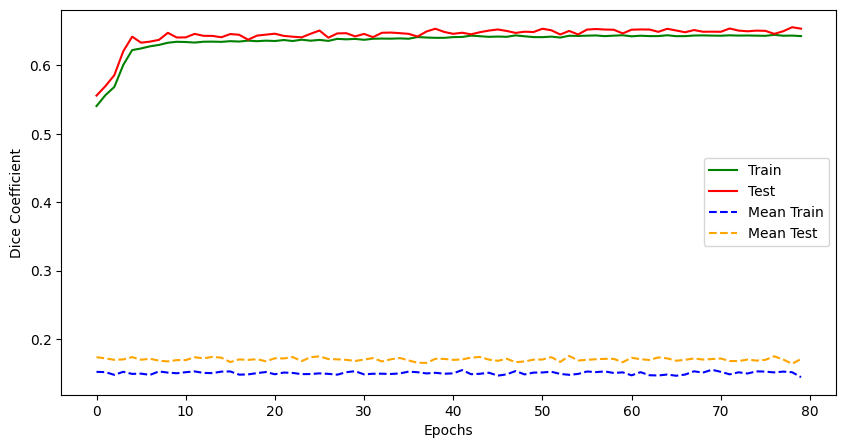

In [353]:
plt.figure(figsize=(10, 5))
plt.plot(train_dice_coefficients, label='Train', color='green')
plt.plot(test_dice_coefficients, label='Test', color='red')
if plot_mean:
    plt.plot(mean_train_dice_coefficients, label='Mean Train', color='blue', linestyle='--')
    plt.plot(mean_test_dice_coefficients, label='Mean Test', color='orange', linestyle='--')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient')
plt.show()